In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns


# This is a basic test for https://github.com/taspinar/twitterscraper. Using the demo data looking at all tweets re. Trump. 

# twitterscraper "climate change from:metrolosangeles" --lang en -o cc_test.JSON -l 100

FUNCTIONS FUNCTIONS FUNCTIONS

In [9]:
#FUNCTION: TWITTERSCRAPER TO JSON file

def twitterscraper(username, keyword, keyword_abrev):
    string = ('twitterscraper "'+ keyword+' from:'+username+'" --lang en -o '+username
                    +'_'+keyword_abrev+'.JSON -l 400')
    return print(string.lower())
    
for username in ["SeattleOPCD", "CityofSeattle", "seattledot", "SeattleOSE", "kcmetrobus"]:
    twitterscraper(username, "resilience", "res")
    
    
# example string
#string = "THIS SHOULD BE LOWERCASE!"
#print(string.lower())

twitterscraper "resilience from:seattleopcd" --lang en -o seattleopcd_res.json -l 400
twitterscraper "resilience from:cityofseattle" --lang en -o cityofseattle_res.json -l 400
twitterscraper "resilience from:seattledot" --lang en -o seattledot_res.json -l 400
twitterscraper "resilience from:seattleose" --lang en -o seattleose_res.json -l 400
twitterscraper "resilience from:kcmetrobus" --lang en -o kcmetrobus_res.json -l 400


In [10]:
#FUNCTION JSON TO DATAFRAME
def json_to_df_tweets (csv_file):
    with open(csv_file) as f:
      data = json.load(f)
    
    d = {'username': [x['username'] for x in data],
        'time': [x['timestamp'] for x in data],
        'tweet': [x['text'] for x in data],
        'likes': [x['likes'] for x in data],
        'replies': [x['replies'] for x in data]
        }
    
    df_Test = pd.DataFrame.from_dict(d)
    
    return df_Test

In [13]:
#FUNCTION  COMBINE DATAFRAME
def combine_dataframe (df1, df2, df3, df4, df5): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    return d4.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

In [11]:
# print(data[:500])

# pp.pprint(data)

# 
# 
# 
# #wordcloud
# 
# 
# 
# 

# In[94]:


#for x in data:
  # print(x['text'])


# In[4]:


d = {'username': [x['username'] for x in data1],
    'time': [x['timestamp'] for x in data1],
    'tweet': [x['text'] for x in data1],
    'likes': [x['likes'] for x in data1],
    'replies': [x['replies'] for x in data1]
    }

df = pd.DataFrame.from_dict(d)
df

NameError: name 'data1' is not defined

Seattle Climate Change

In [ ]:
# Twitter data that states "climate change"; the scraper loads in requests by user
seattle_cc = json_to_df_tweets ('seattle_cc.JSON')
kingmetro_cc = json_to_df_tweets ('kingmetro_cc.json')
seattledot_cc = json_to_df_tweets('seattledot_cc.json')
seattleose_cc = json_to_df_tweets('seattleose_cc.json')
seattleplan_cc = json_to_df_tweets('seattleplan_cc.json')

In [ ]:
def combine_dataframe (df1, df2, df3, df4, df5): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    return d4.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

In [8]:
seattle_cc_tweets = combine_dataframe(seattle_cc, kingmetro_cc, seattledot_cc, seattleose_cc, seattleplan_cc)
seattle_cc_tweets

,username,time,tweet,likes,replies
0,City of Seattle,2017-06-14T16:16:47,Denial is not a solution. Explore @EPA climate...,8,3
2,City of Seattle,2013-02-11T20:26:18,Climate Change Open House: Help the City prior...,1,0
0,King County Metro 🚏 🚌🚎⛴🚐,2015-04-01T02:08:44,We have a mandate because of climate change..T...,1,1
2,King County Metro 🚏 🚌🚎⛴🚐,2017-10-24T00:20:57,To address climate change and improve air qual...,8,0
3,King County Metro 🚏 🚌🚎⛴🚐,2017-09-26T20:29:12,"A modern electric bus fleet is safe, clean, qu...",29,2
...,...,...,...,...,...
24,Seattle Office of Planning & Community Develop...,2018-08-22T14:30:05,"As climate change worsens, we will likely see ...",0,0
25,Seattle Office of Planning & Community Develop...,2018-07-06T16:30:07,"""When it comes to climate change, women leader...",1,0
26,Seattle Office of Planning & Community Develop...,2018-04-13T18:02:01,Climate change is making resilience a more urg...,0,0
27,Seattle Office of Planning & Community Develop...,2018-03-13T18:45:12,"""The bubonic plague spread, in part, because o...",0,0


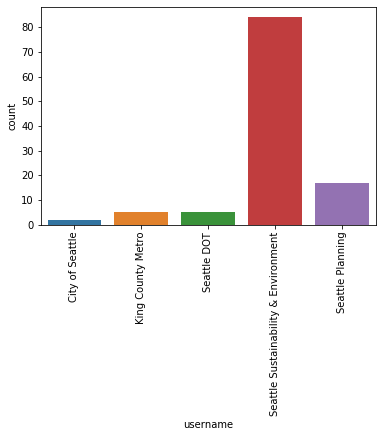

In [12]:
ax = sns.countplot(x='username', data=seattle_cc_tweets)
ax.set_xticklabels(labels=['City of Seattle', 'King County Metro', 'Seattle DOT', 'Seattle Sustainability & Environment', 'Seattle Planning', 'Port'],
                   rotation=90)
plt.show()

                                                    count      mean  \
username                                                              
City of Seattle                                       2.0  4.500000   
King County Metro 🚏 🚌🚎⛴🚐                              5.0  7.600000   
Seattle OSE                                          84.0  1.261905   
Seattle Office of Planning & Community Development   17.0  1.117647   
seattledot                                            5.0  5.400000   

                                                          std  min   25%  50%  \
username                                                                        
City of Seattle                                      4.949747  1.0  2.75  4.5   
King County Metro 🚏 🚌🚎⛴🚐                            12.421755  0.0  0.00  1.0   
Seattle OSE                                          3.322501  0.0  0.00  0.0   
Seattle Office of Planning & Community Development   1.452685  0.0  0.00  1.0   
seattledot      

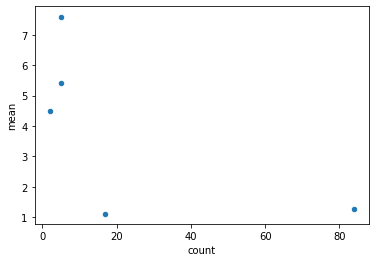

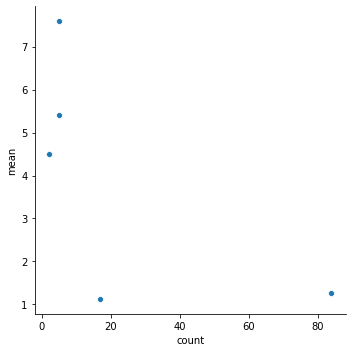

In [93]:
likes_per = seattle_cc_tweets.groupby("username").likes.describe()
print(likes_per)

likes_per.plot.scatter('count', 'mean')
sns.relplot(x="count", y="mean", data=likes_per);

Seattle "Resilience"

In [ ]:
seattleose_res = json_to_df_tweets('seattleose_res.json')
seattleopcd_res = json_to_df_tweets('seattleopcd_res.json')

In [18]:
def combine_dataframe (df1, df2): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    return d1.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

seattle_res_tweets = combine_dataframe(seattleose_res, seattleopcd_res)
seattle_res_tweets

,username,time,tweet,likes,replies
0,Seattle OSE,2018-02-09T16:04:27,"""Enhancing urban resilience to climate change ...",3,1
1,Seattle OSE,2018-02-03T00:26:32,@MayorJenny spent the week highlighting Seattl...,2,0
4,Seattle OSE,2018-01-22T15:58:09,Just one of the many reasons why we are priori...,3,1
6,Seattle OSE,2020-01-31T17:01:26,More and more meteorologists are sharing clima...,6,0
0,Seattle Office of Planning & Community Develop...,2017-02-10T19:30:01,Viewpoint: City of Atlanta continues its effor...,1,0
2,Seattle Office of Planning & Community Develop...,2017-09-19T21:06:02,"Tonight's panel addresses how homeowners, new ...",2,2
3,Seattle Office of Planning & Community Develop...,2017-09-05T19:27:53,We're proud to announce our next #UrbanInnovat...,1,0
6,Seattle Office of Planning & Community Develop...,2018-04-25T16:00:24,Gina Ford is a guest lecturer tonight at the U...,3,0
7,Seattle Office of Planning & Community Develop...,2018-04-13T18:02:01,Climate change is making resilience a more urg...,0,0
10,Seattle Office of Planning & Community Develop...,2019-09-30T17:45:02,A Duwamish Valley Community Resilience Worksho...,0,0


In [ ]:
!twitterscraper "resilience from:seattledot" --lang en -o seattledot_res.json -l 400

In [25]:
"""#SEATTLE STUFF FOR LATER

seattle_cc, kingmetro_cc, seattledot_cc, seattleose_cc, seattleplan_cc 

seattle_cc_tweets["likes_per_tweet"] = seattle_cc_tweets["likes"]/seattle_cc_tweets["username"].str.contains("City of Seattle")
seattle_cc_tweets["likes_per_tweet"]

#OTHER NOTEBOOK STUFF TO REFERENCE 

rents['region'].str.contains('CA'))


buildings.loc[buildings.stories<7].groupby('stories').residential_units.describe()



df['pct_change'] = 100*(df['2019-12']-df['2014-12'])/df['2014-12']
df['region'] = df['RegionName']
rent_change = df[['region','pct_change']].copy()
rent_change.head()




["likes_per_tweet"] = seattle_cc_tweets["likes"]/seattle_cc_tweets["username"].str.contains("City of Seattle")
seattle_cc_tweets["likes_per_tweet"]

buildings.loc[buildings.stories<7].groupby('stories').residential_units.describe()



# Let's adjust the bins and remove the kernel density esimate (kde):

data = trips.loc[(trips['mode'] == 2) & 
                 (trips.trip_distance_miles <= 5)]

ax = sns.distplot(a = data.trip_distance_miles,
                  bins = 20,
                  color = 'orange',
                  kde = False)

ax.set_title('Distance of bicycle trips in California')
plt.show()
"""

'#SEATTLE STUFF FOR LATER\n\nseattle_cc, kingmetro_cc, seattledot_cc, seattleose_cc, seattleplan_cc \n\nseattle_cc_tweets["likes_per_tweet"] = seattle_cc_tweets["likes"]/seattle_cc_tweets["username"].str.contains("City of Seattle")\nseattle_cc_tweets["likes_per_tweet"]\n\n#OTHER NOTEBOOK STUFF TO REFERENCE \n\nrents[\'region\'].str.contains(\'CA\'))\n\n\nbuildings.loc[buildings.stories<7].groupby(\'stories\').residential_units.describe()\n\n\n\ndf[\'pct_change\'] = 100*(df[\'2019-12\']-df[\'2014-12\'])/df[\'2014-12\']\ndf[\'region\'] = df[\'RegionName\']\nrent_change = df[[\'region\',\'pct_change\']].copy()\nrent_change.head()\n\n\n\n\n["likes_per_tweet"] = seattle_cc_tweets["likes"]/seattle_cc_tweets["username"].str.contains("City of Seattle")\nseattle_cc_tweets["likes_per_tweet"]\n\nbuildings.loc[buildings.stories<7].groupby(\'stories\').residential_units.describe()\n\n\n\n# Let\'s adjust the bins and remove the kernel density esimate (kde):\n\ndata = trips.loc[(trips[\'mode\'] == 2)